In [138]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import numpy as np
import seaborn as sns
import datetime as dt
import cufflinks as cf
from IPython.display import display, HTML
from sodapy import Socrata
import streamlit as st
import mysql.connector
import datetime
import time
from googletrans import Translator

from sqlalchemy import create_engine
from pathlib import Path
import csv
import os

In [142]:
def calidaDato (data):
    df = data
    calidad = []
    mascara = df.isna().sum()
    for i in range(0,len(mascara)):
        p = (df.shape[0]- mascara[i]) / df.shape[0]
        calidad.append([mascara.index[i], round((p*100),2)])
   
    calidad = pd.DataFrame(calidad)
    calidad.rename(columns={0:'Columna', 1: 'Calida %'}, inplace=True)
    
    return calidad

In [3]:
def renombracol(data):
    data = data
    translator = Translator()
    for i in data.columns:
        b = i.replace('_',' ')
        data.rename(columns={i:b}, inplace=True)
        data.rename(columns={'owner':'owne'}, inplace=True)
        
    for i in data.columns:
        data.rename(columns={i:translator.translate(i, dest="es").text.title()}, inplace=True)
        
    return data

In [136]:
def subircsv(nomcarpeta, nomarchivo, extencion, df):
    df = df
    filepath = Path(nomcarpeta + '/' + nomarchivo +'.' + extencion)  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath, index=False)  

In [80]:
import hashlib
def hash(df,colum):
    nom = "Id" + colum
    if df[colum].dtype == 'int64':
        df[colum] = df[colum].astype(str)
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())
        df[colum] = df[colum].astype(int)
    else:
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())
    return df

In [51]:
data02 = pd.read_csv('D:\ProyectoFinal\dataset\global_power_plant_database.csv', sep=',', low_memory=False, encoding='utf-8')

In [58]:

hechos = pd.read_csv('D:\emissionsmap\documentation\TablasNormal\Tabla_Hecho.csv', sep=',', low_memory=False, encoding='utf-8')

In [59]:
hechos.Combustible.unique()

array(['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro',
       'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste',
       'Wave and Tidal', 'Wind', 'all_energy_types', 'natural_gas',
       'petroleum_n_other_liquids', 'renewables_n_other', nan],
      dtype=object)

In [62]:
hechos


,Año,País,Combustible,Id_Año,Id_País,Id_Combustible
0,1959.0,World,Biomass,e4dd5528f7596dcdf871aa55cfccc53c,f5a7924e621e84c9280a9a27e1bcb7f6,57a34c10edc9db4cc4fbfc06367285f8
1,1960.0,Afghanistan,Coal,7f16109f1619fd7a733daf5a84c708c1,6e9767f4f15357401b148b9a8ced14ef,ff8cfc4e6a79e6514be2533a5f5506ad
2,1961.0,Albania,Cogeneration,f106b7f99d2cb30c3db1c3cc0fde9ccb,c420ddff824a5c0eec70dd23d62496bc,be8c640ab7313b88c232af9328ebf5a8
3,1962.0,Algeria,Gas,95f6870ff3dcd442254e334a9033d349,575b9408b6daa2ddcefbcf6d81c9b4c9,635459702f9817de29e608fa3395637c
4,1963.0,American Samoa,Geothermal,c215b446bcdf956d848a8419c1b5a920,b86f99753a08d00fa3ca946d07ecac29,3f3f7ddaa26a792f9707f4de5f077cf3
...,...,...,...,...,...,...
226,NaN,Wake Island,NaN,7ecfb3bf076a6a9635f975fe96ac97fd,89a94c76c0eef267f267d9a96d3419d0,7ecfb3bf076a6a9635f975fe96ac97fd
227,NaN,Western Sahara,NaN,7ecfb3bf076a6a9635f975fe96ac97fd,1bdb61bdbf5bc9a2cdc5db037ab610e0,7ecfb3bf076a6a9635f975fe96ac97fd
228,NaN,Yemen,NaN,7ecfb3bf076a6a9635f975fe96ac97fd,724bf4ca11a567636547a92a37e397b7,7ecfb3bf076a6a9635f975fe96ac97fd
229,NaN,Zambia,NaN,7ecfb3bf076a6a9635f975fe96ac97fd,b0aa0804e676a38255af4fd70236af7c,7ecfb3bf076a6a9635f975fe96ac97fd


In [143]:
calidad = calidaDato(data02)


In [7]:
data = renombracol(data02)

In [101]:
tabla_global_planta_energia = data.copy()

In [102]:
tabla_global_planta_energia = data[['País', 'País Largo', 'Combustible Principal']]
tabla_global_planta_energia = tabla_global_planta_energia.drop_duplicates()


In [103]:
tabla_global_planta_energia['cant'] = 1 #unidad por dato

In [104]:
hechos['Combustible'].unique()

array(['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro',
       'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste',
       'Wave and Tidal', 'Wind', 'all_energy_types', 'natural_gas',
       'petroleum_n_other_liquids', 'renewables_n_other', nan],
      dtype=object)

In [105]:
tabla_global_planta_energia.rename(columns={'Combustible Principal':'Combustible'}, inplace=True)

In [106]:
tabla_global_planta_energia['Combustible'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [107]:
tabla_global_planta_energia

,País,País Largo,Combustible,cant
0,AFG,Afghanistan,Hydro,1
1,AFG,Afghanistan,Solar,1
6,AFG,Afghanistan,Gas,1
9,ALB,Albania,Hydro,1
16,ALB,Albania,Other,1
...,...,...,...,...
34921,ZMB,Zambia,Solar,1
34928,ZMB,Zambia,Coal,1
34930,ZMB,Zambia,Biomass,1
34934,ZWE,Zimbabwe,Coal,1


In [108]:
df = tabla_global_planta_energia.copy()

In [109]:
df = hash(df, 'País')

In [111]:
df.set_index('IdPaís', inplace=True)
df = df.reset_index()

In [113]:
df.head(2)

,IdPaís,País,País Largo,Combustible,cant
0,c902514ac30b6e23dbb0c3dc80ec7d4a,AFG,Afghanistan,Hydro,1
1,c902514ac30b6e23dbb0c3dc80ec7d4a,AFG,Afghanistan,Solar,1


In [122]:
#participacion porcentual de eneregia a nivel mundial
df = df.assign(Percentage = lambda x: (x['cant'] /df['cant'].sum() * 100))

In [137]:
subircsv('TablasNormal', 'Partic_Global_Energia', 'csv', df)

In [124]:
df01 = df.groupby('Combustible')['Percentage'].sum() # cantidad por energia primaria 
df01 = df01.reset_index()

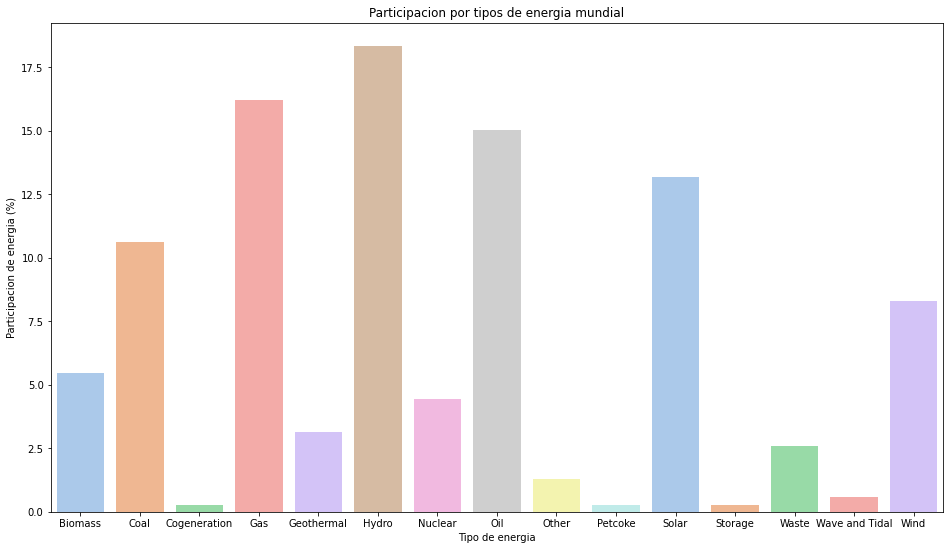

In [127]:
plt.figure(figsize=(16,9))
sns.barplot(data=df01, x="Combustible", y="Percentage", palette='pastel')
plt.title('Participacion por tipos de energia mundial')
plt.xlabel('Tipo de energia')
plt.ylabel('Participacion de energia (%)')
plt.show()